<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Data_205_Project_Part_I_detention_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [5]:
# tab-separated data into pandas data frame.
df = pd.read_json('https://data.montgomerycountymd.gov/resource/gknn-vrfa.json')

In [6]:
df.head()

,month_year,detention_services,detention_services_and_community_corrections_names,category,average_daily_population
0,2021-02-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
1,2021-02-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
2,2021-02-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
3,2021-02-01T00:00:00.000,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
4,2021-02-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0


In [10]:
# check dataframe type
type(df)

pandas.core.frame.DataFrame

In [14]:
# change column names
df_1 = df.rename(columns = {"month_year": "Date", "detention_services":"DSCC Abbr.", "detention_services_and_community_corrections_names":"DSCC Names", "average_daily_population" : "Avg. Daily Pop."})
df_1.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-02-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
1,2021-02-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
2,2021-02-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
3,2021-02-01T00:00:00.000,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
4,2021-02-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0


In [15]:
# Stripping time but this strip does not remain in further code
df_1['Date'].str.rstrip('T00:00:00.000')

0      2021-02-01
1      2021-02-01
2      2021-02-01
3      2021-02-01
4      2021-02-01
          ...    
439    2015-01-01
440    2015-01-01
441    2015-01-01
442    2015-01-01
443    2015-01-01
Name: Date, Length: 444, dtype: object

In [16]:
# Checking data types for each column
print(df_1.dtypes)

Date               object
DSCC Abbr.         object
DSCC Names         object
category           object
Avg. Daily Pop.     int64
dtype: object


In [17]:
#Checking Shape
print(df_1.shape)

(444, 5)


In [18]:
# Describe
df_1.describe()

,Avg. Daily Pop.
count,444.000000
mean,374.328829
std,291.345574
min,0.000000
25%,107.000000
50%,247.500000
75%,627.250000
max,1025.000000


In [19]:
# Check null 
df_1.isnull()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
439,False,False,False,False,False
440,False,False,False,False,False
441,False,False,False,False,False
442,False,False,False,False,False


In [20]:
# Null sum
df_1.isnull().sum()

Date               0
DSCC Abbr.         0
DSCC Names         0
category           0
Avg. Daily Pop.    0
dtype: int64

In [21]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [24]:
# group by Month/Year
df_1_time = df_1.groupby('Date')
df_1_time.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-02-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
1,2021-02-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
2,2021-02-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
3,2021-02-01T00:00:00.000,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
4,2021-02-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
...,...,...,...,...,...
438,2015-01-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505
439,2015-01-01T00:00:00.000,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,101
440,2015-01-01T00:00:00.000,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,77
441,2015-01-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,721


In [27]:
# Arrange by DSCC Abbreviation - did not work
df_1_abbr = df_1.groupby('DSCC Abbr.')
df_1_abbr.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-02-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
1,2021-02-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
2,2021-02-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
3,2021-02-01T00:00:00.000,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
4,2021-02-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
5,2021-02-01T00:00:00.000,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,68
6,2021-01-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,335
7,2021-01-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,909
8,2021-01-01T00:00:00.000,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,69
9,2021-01-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0


In [29]:
# Arrange by DSCC Abbreviation then by sort by Date
df_1_abbr2 = df_1.groupby('DSCC Abbr.').apply(lambda x: x.sort_values('Date'))
df_1_abbr2.head(30)

Date  ... Avg. Daily Pop.
DSCC Abbr.                               ...                
ACS        441  2015-01-01T00:00:00.000  ...             721
           434  2015-02-01T00:00:00.000  ...             738
           429  2015-03-01T00:00:00.000  ...             749
           420  2015-04-01T00:00:00.000  ...             780
           419  2015-05-01T00:00:00.000  ...             751
           413  2015-06-01T00:00:00.000  ...             699
           405  2015-07-01T00:00:00.000  ...             705
           400  2015-08-01T00:00:00.000  ...             739
           390  2015-09-01T00:00:00.000  ...             703
           384  2015-10-01T00:00:00.000  ...             758
           382  2015-11-01T00:00:00.000  ...             879
           376  2015-12-01T00:00:00.000  ...             882
           366  2016-01-01T00:00:00.000  ...             814
           363  2016-02-01T00:00:00.000  ...             838
           355  2016-03-01T00:00:00.000  ...             885
           352  2016-04-01T00:00:00.000  ...             962
           344  2016-05-01T00:00:00.000  ...            1025
           340  2016-06-01T00:00:00.000  ...             945
           331  2016-07-01T00:00:00.000  ...             933
           325  2016-08-01T00:00:00.000  ...             948
           320  2016-09-01T00:00:00.000  ...             955
           316  2016-10-01T00:00:00.000  ...             894
           311  2016-11-01T00:00:00.000  ...             804
           300  2016-12-01T00:00:00.000  ...             729
           294  2017-01-01T00:00:00.000  ...             700
           290  2017-02-01T00:00:00.000  ...             731
           282  2017-03-01T00:00:00.000  ...             703
           279  2017-04-01T00:00:00.000  ...             649
           273  2017-05-01T00:00:00.000  ...             644
           264  2017-06-01T00:00:00.000  ...             645

[30 rows x 5 columns]

In [30]:
# Simplify name
df_2 = df_1_abbr2

In [31]:
# Create separate columns for month day and year 
df_2.Date = pd.to_datetime(df_2.Date)

In [32]:
df_2[['month', 'year']] = df_2.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_2

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        441 2015-01-01        ACS  ...    01   2015
           434 2015-02-01        ACS  ...    02   2015
           429 2015-03-01        ACS  ...    03   2015
           420 2015-04-01        ACS  ...    04   2015
           419 2015-05-01        ACS  ...    05   2015
...                   ...        ...  ...   ...    ...
PTSU       29  2020-10-01       PTSU  ...    10   2020
           20  2020-11-01       PTSU  ...    11   2020
           17  2020-12-01       PTSU  ...    12   2020
           7   2021-01-01       PTSU  ...    01   2021
           1   2021-02-01       PTSU  ...    02   2021

[444 rows x 7 columns]

In [33]:
# month and year separate columns created
df_2.groupby(df_2['year'])
df_2.head(10)

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        441 2015-01-01        ACS  ...    01   2015
           434 2015-02-01        ACS  ...    02   2015
           429 2015-03-01        ACS  ...    03   2015
           420 2015-04-01        ACS  ...    04   2015
           419 2015-05-01        ACS  ...    05   2015
           413 2015-06-01        ACS  ...    06   2015
           405 2015-07-01        ACS  ...    07   2015
           400 2015-08-01        ACS  ...    08   2015
           390 2015-09-01        ACS  ...    09   2015
           384 2015-10-01        ACS  ...    10   2015

[10 rows x 7 columns]

In [36]:
# Remove DSCC Name Column
df_2.drop(df_2.columns[[2]], axis=1, inplace=True,)
df_2.head(5)

Date DSCC Abbr.  Avg. Daily Pop. month   year
DSCC Abbr.                                                        
ACS        441 2015-01-01        ACS              721    01   2015
           434 2015-02-01        ACS              738    02   2015
           429 2015-03-01        ACS              749    03   2015
           420 2015-04-01        ACS              780    04   2015
           419 2015-05-01        ACS              751    05   2015

In [39]:
# Create separate columns for month day and year 
df_1.Date = pd.to_datetime(df_1.Date)

In [38]:
df_1[['month', 'year']] = df_1.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_1

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,2021-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021
...,...,...,...,...,...,...,...
439,2015-01-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,101,01,2015
440,2015-01-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,77,01,2015
441,2015-01-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,721,01,2015
442,2015-01-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,162,01,2015


In [40]:
# drop date column
df_1a = df_1.drop(df_1.columns[0:1], axis=1)

In [41]:
df_1a.head(5)

,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021


In [42]:
# Trying to remove index column
df_1a.reset_index(drop=True, inplace=True)
df_1a.head(5)

,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
1,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
2,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
3,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
4,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021


In [43]:
# Group by Year Sum
df_year = df_1a.groupby(['year'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_year.head()

,year,Avg. Daily Pop.
0,2015,27811
1,2016,30138
2,2017,27102
3,2018,27464
4,2019,25649


In [66]:
# Checking data types for each column
print(df_1.dtypes)

Date               datetime64[ns]
DSCC Abbr.                 object
DSCC Names                 object
category                   object
Avg. Daily Pop.             int64
month                      object
year                       object
dtype: object


Text(0, 0.5, 'Avg. Daily Pop.')

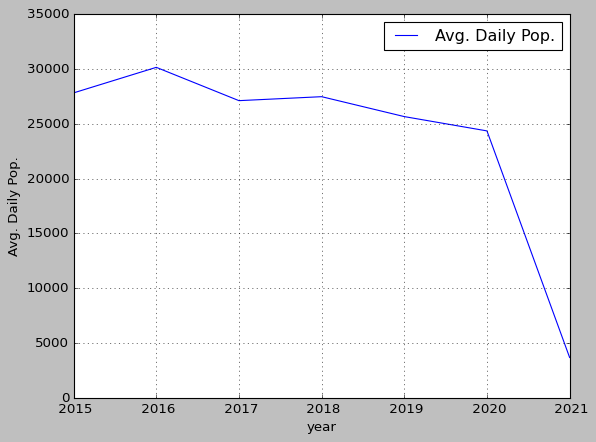

In [44]:
# matplotlib plot
import matplotlib.pyplot as plt
df_year.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

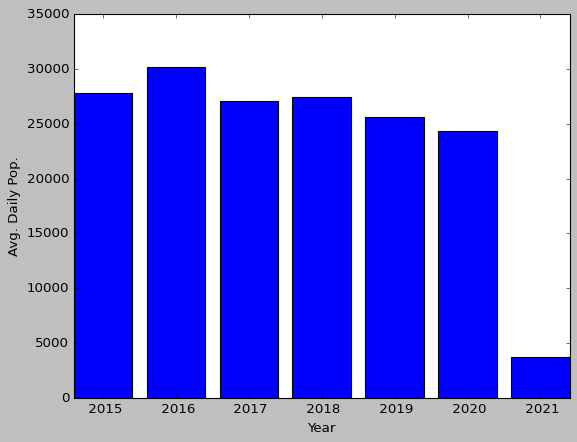

In [45]:
# matplotlib barplot
import matplotlib.pyplot as plt
x = df_year['year']
y = df_year['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [46]:
# Sum of avg. daily pop by month and year
df_monthyear = df_1a.groupby(['year', 'month'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_monthyear.head(20)

,year,month,Avg. Daily Pop.
0,2015,01,2284
1,2015,02,2277
2,2015,03,2273
3,2015,04,2343
4,2015,05,2310
5,2015,06,2228
6,2015,07,2215
7,2015,08,2311
8,2015,09,2320
9,2015,10,2347


Text(0, 0.5, 'Avg. Daily Pop.')

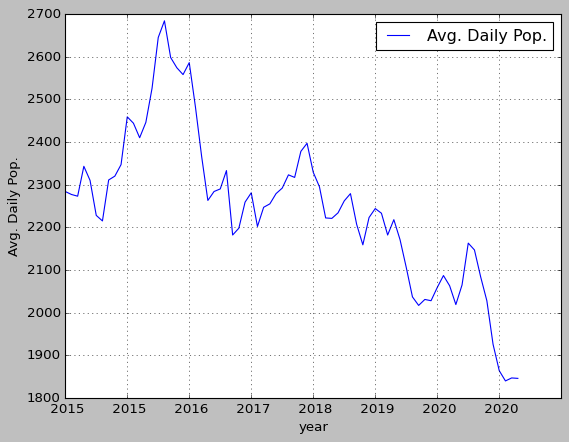

In [47]:
# matplotlib plot
df_monthyear.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

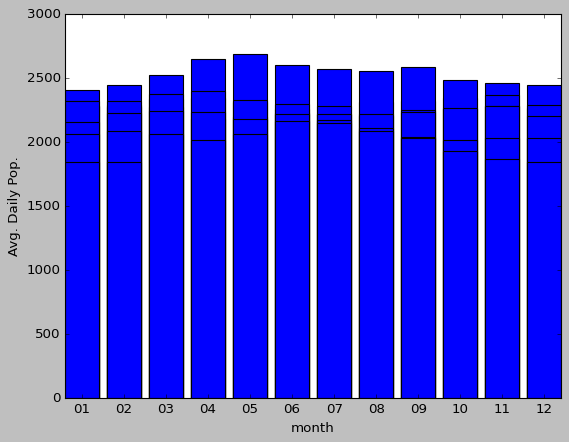

In [48]:
x = df_monthyear['month']
y = df_monthyear['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [49]:
# trying to isolate entries by year
# df_monthyear.groupby('year').get_group(2015)

In [50]:
# trying to get rid of the lines and select only months for 2015
df_2015 = df_monthyear[df_monthyear['year'] == '2015']
df_2015.head()

,year,month,Avg. Daily Pop.


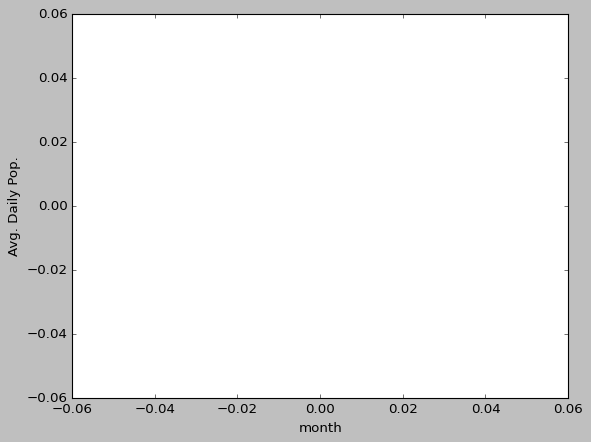

In [51]:
# Trying to Plot only 2015
x = df_2015['month']
y = df_2015['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [53]:
# example code:  df[(df['age'] > 28) & (df['grade'] == 'A')]
df_monthyear[(df_monthyear['year'] == '2016')]

,year,month,Avg. Daily Pop.


In [57]:
x = df_m_adp['date']
y = df_m_adp['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()
# in plot below the separate lines in each bar are for each year. Will try to add color coded stacking.

NameError: ignored

In [55]:
df_dscc = df_1.groupby('DSCC Names').apply(lambda x: x.sort_values('year'))
df_dscc.head(20)

Date DSCC Abbr.  ... month   year
DSCC Names                                                ...             
Alternative Community Services 441 2015-01-01        ACS  ...    01   2015
                               376 2015-12-01        ACS  ...    12   2015
                               382 2015-11-01        ACS  ...    11   2015
                               384 2015-10-01        ACS  ...    10   2015
                               390 2015-09-01        ACS  ...    09   2015
                               400 2015-08-01        ACS  ...    08   2015
                               434 2015-02-01        ACS  ...    02   2015
                               413 2015-06-01        ACS  ...    06   2015
                               419 2015-05-01        ACS  ...    05   2015
                               420 2015-04-01        ACS  ...    04   2015
                               429 2015-03-01        ACS  ...    03   2015
                               405 2015-07-01        ACS  ...    07   2015
                               300 2016-12-01        ACS  ...    12   2016
                               316 2016-10-01        ACS  ...    10   2016
                               320 2016-09-01        ACS  ...    09   2016
                               331 2016-07-01        ACS  ...    07   2016
                               311 2016-11-01        ACS  ...    11   2016
                               344 2016-05-01        ACS  ...    05   2016
                               340 2016-06-01        ACS  ...    06   2016
                               366 2016-01-01        ACS  ...    01   2016

[20 rows x 7 columns]

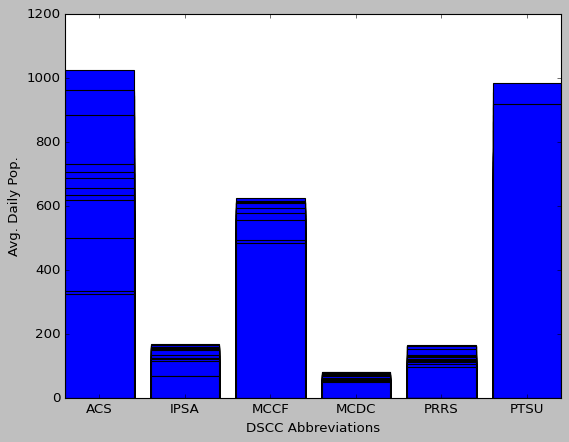

In [56]:
x = df_dscc['DSCC Abbr.']
y = df_dscc['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('DSCC Abbreviations')
plt.ylabel('Avg. Daily Pop.')
plt.show()
# not sure what lines represent, could be month/year. 

In [64]:
df_2020 = [(df_monthyear['year'] == 2020)]
df_2020[:]

[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 69    False
 70    False
 71    False
 72    False
 73    False
 Name: year, Length: 74, dtype: bool]

In [65]:
# df_2020 = df_monthyear.loc[df_monthyear['year'] > 2019]

TypeError: ignored

In [69]:
# With no output of data - maybe because it is an object type not int or str?
df_monthyear.loc[(df_monthyear['year']>= '2019')]

,year,month,Avg. Daily Pop.
